In [1]:
import seaborn as sns
sns.set_palette('colorblind')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import sys
sys.path.append('../')

from library_analyzer import Library

In [2]:
mut_id_regex = '(?P<Mut_num>\d*)pt_(?P<Position>\d*)(?P<AA>[\w*]*)_v(?P<Version>\d*)'
group_cols = ['Position','AA']
rate_method = 'l2fc'

sheet_name = 'Original_Data'

aa_keys = np.array('R,K,H,D,E,S,T,N,Q,C,G,P,A,V,I,L,M,F,Y,W,*'.split(','))

control_column = 'AA'
positive_values = ['WT']
negative_values = ['*']

# colorscheme = 'RdBu'
# WT_color = 'xkcd:violet'

sunset_cmap = sns.blend_palette(["#075AFF", "#FFFFCC","#FF0000"],as_cmap=True)
to_red_cmap = sns.blend_palette(['#CD3333','xkcd:white'],as_cmap=True)

In [3]:
replicates = {'lib1_rep1':['P0_R1','P10_R1'],
              'lib1_rep2':['P0_R2','P10_R2']}
wt_aa = 'DEPSDLEELEKFAKTFKQRRIKLGFTQGDVGLAMGKLYGNDFSQTTISRFEALNL'
id_cols = ['id']
process_call = 'id'
data_file = './Library_1.xlsx'

lib1 = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)

In [4]:
replicates = {'lib2_rep1':['P0_Rep1','P10_Rep1'],
              'lib2_rep2':['P0_Rep2','P10_Rep2']}
wt_aa = 'EALNLSFKNMCKLKPLLEKWLNDAESSPSDPSVSTPSSYPSLSEVFGRKRKKRTSIETNIRLTLEKRFQD'
id_cols = ['ID']
process_call = 'ID'
data_file = './Library_2.xlsx'

lib2 = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)


lib2, fig_pre, fig_post = lib2.rescale_by_replicate_group('lib2_rep2','lib2_rep1')
plt.close(fig_pre.fig)
plt.close(fig_post.fig)

In [5]:
replicates = {'lib3_rep1':['P0_Rep1','P10_Rep1'],
              'lib3_rep2':['P0_Rep2','P10_Rep2']}
wt_aa = 'RFQDNPKPSSEEISMIAEQLSMEKEVVRVWFCNRRQKEKRINCPVATPIKPPVYN'
id_cols = ['ID']
process_call = 'ID'
data_file = './Library_3.xlsx'

lib3 = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)

In [6]:
lib1.id_cols=['ID']
lib1.data_df = lib1.data_df.rename(columns={'id':'ID'},level=1)

lib_merged, fig_pre, fig_post = Library.merge_by_overlap(lib2,lib1,50,0, lib1.WT_seq+lib2.WT_seq[5:], control_col='AA',control_val=['WT','*'],automatically_rescale_by_controls=True)
plt.close(fig_pre.fig)
plt.close(fig_post.fig)

/Users/jackdesmarais/Documents/Kinney_lab/DMS_designer/library_analysis/examples/../library_analyzer.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dest_df[('meta',position_col)][~wt_mask] = dest_df[('meta',position_col)][~wt_mask].astype(int)+dest_position_shift
/Users/jackdesmarais/Documents/Kinney_lab/DMS_designer/library_analysis/examples/../library_analyzer.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_df[('meta',position_col)][~wt_mask] = source_df[('meta',position_col)][~wt_mask].astype(int)+source_position_shift
/Users/jackdesmarais/miniconda3/envs/Vakoc_library_analysis/lib/python3.9/site

In [7]:
lib_merged, fig_pre, fig_post = Library.merge_by_overlap(lib_merged,lib3,0,116, lib_merged.WT_seq+lib3.WT_seq[4:],automatically_rescale_linearly=True)
plt.close(fig_pre.fig)
plt.close(fig_post.fig)

/Users/jackdesmarais/Documents/Kinney_lab/DMS_designer/library_analysis/examples/../library_analyzer.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dest_df[('meta',position_col)][~wt_mask] = dest_df[('meta',position_col)][~wt_mask].astype(int)+dest_position_shift
/Users/jackdesmarais/Documents/Kinney_lab/DMS_designer/library_analysis/examples/../library_analyzer.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_df[('meta',position_col)][~wt_mask] = source_df[('meta',position_col)][~wt_mask].astype(int)+source_position_shift


[(0.3411764705882353, 0.403921568627451, 0.996078431372549),
 (0.5659515570934256, 0.5395617070357555, 0.9534486735870819),
 (0.8509803921568627, 0.8392156862745098, 0.8549019607843137),
 (0.9999538638985006, 0.9982468281430219, 0.7981545559400232),
 (0.996078431372549, 0.8509803921568627, 0.6431372549019608),
 (1.0, 0.6820761245674736, 0.46117647058823497),
 (1.0, 0.0, 0.0)]

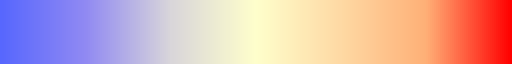

In [8]:
sunset_pal = sns.blend_palette(["#5767FE", '#918AF3','#D9D6DA' , "#FFFFCC", '#FED9A4' ,"#FFB077", '#FF0000'],n_colors=7,as_cmap=False)
display(sunset_pal)
sunset_cmap = sns.blend_palette(["#5767FE", '#918AF3','#D9D6DA' , "#FFFFCC", '#FED9A4' ,"#FFB077", '#FF0000'],as_cmap=True)
sunset_cmap

[(1.0, 1.0, 1.0),
 (1.0, 0.7984313725490196, 0.7984313725490196),
 (1.0, 0.39686274509803926, 0.39686274509803926),
 (0.9952941176470588, 0.0, 0.0),
 (0.6, 0.0, 0.0)]

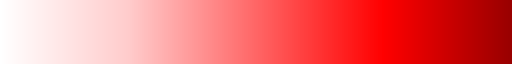

In [9]:
to_red_pal = sns.blend_palette(['#990000','#FF0000','#FF6666','#FFCCCC', 'xkcd:white'][::-1],n_colors=5,as_cmap=False)
display(to_red_pal)
to_red_cmap = sns.blend_palette(['#990000','#FF0000','#FF6666','#FFCCCC', 'xkcd:white'][::-1],as_cmap=True)
to_red_cmap

In [10]:
from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vcenter=0, vmax=2, vmin=-4)

heatmap_fig = lib_merged.make_singles_heatmap('AA', ['WT'], ['*'], -0.5,mut_num_col='Mut_num', position_col='Position', main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                            rc_params={"figure.figsize" : (30,6), 'figure.dpi':1000}, grid=0.5, invert_mutability=True, norm=norm, seq_start=183, tick_interval=10)


cbar_pos = heatmap_fig.axes[3].get_position()
heatmap_fig.axes[3].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1]+0.15, cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]-0.3))

cbar_pos = heatmap_fig.axes[1].get_position()
heatmap_fig.axes[1].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1], cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]))
plt.show()

heatmap_fig = lib_merged.make_singles_heatmap('AA', ['WT'], ['*'], -0.5,mut_num_col='Mut_num', position_col='Position', main_cmap=sunset_cmap, mutability_cmap=sunset_cmap,
                            rc_params={"figure.figsize" : (30,6), 'figure.dpi':1000}, grid=0.5, invert_mutability=True, norm=norm, seq_start=183, tick_interval=10, plot_properties=True)


cbar_pos = heatmap_fig.axes[3].get_position()
heatmap_fig.axes[3].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1]+0.15, cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]-0.3))

cbar_pos = heatmap_fig.axes[1].get_position()
heatmap_fig.axes[1].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1], cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]))
plt.show()

In [23]:
from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vcenter=0, vmax=2, vmin=-4)

heatmap_fig = lib_merged.make_singles_heatmap('AA', ['WT'], ['*'], -0.5,mut_num_col='Mut_num', position_col='Position', main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                            rc_params={"figure.figsize" : (15,6), 'figure.dpi':1000}, grid=0.5, invert_mutability=True, norm=norm, seq_start=183, tick_interval=10,
                            plot_pos = (183,259))


cbar_pos = heatmap_fig.axes[3].get_position()
heatmap_fig.axes[3].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1]+0.15, cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]-0.3))

cbar_pos = heatmap_fig.axes[1].get_position()
heatmap_fig.axes[1].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1], cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]))
plt.show()

heatmap_fig = lib_merged.make_singles_heatmap('AA', ['WT'], ['*'], -0.5,mut_num_col='Mut_num', position_col='Position', main_cmap=sunset_cmap, mutability_cmap=sunset_cmap,
                            rc_params={"figure.figsize" : (15,6), 'figure.dpi':1000}, grid=0.5, invert_mutability=True, norm=norm, seq_start=183, tick_interval=10, plot_properties=True,
                            plot_pos = (183,259))


cbar_pos = heatmap_fig.axes[3].get_position()
heatmap_fig.axes[3].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1]+0.15, cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]-0.3))

cbar_pos = heatmap_fig.axes[1].get_position()
heatmap_fig.axes[1].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1], cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]))
plt.show()

In [24]:
from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vcenter=0, vmax=2, vmin=-4)

heatmap_fig = lib_merged.make_singles_heatmap('AA', ['WT'], ['*'], -0.5,mut_num_col='Mut_num', position_col='Position', main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                            rc_params={"figure.figsize" : (15,6), 'figure.dpi':1000}, grid=0.5, invert_mutability=True, norm=norm, seq_start=183, tick_interval=10,
                            plot_pos = (258,354))


cbar_pos = heatmap_fig.axes[3].get_position()
heatmap_fig.axes[3].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1]+0.15, cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]-0.3))

cbar_pos = heatmap_fig.axes[1].get_position()
heatmap_fig.axes[1].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1], cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]))
plt.show()

heatmap_fig = lib_merged.make_singles_heatmap('AA', ['WT'], ['*'], -0.5,mut_num_col='Mut_num', position_col='Position', main_cmap=sunset_cmap, mutability_cmap=sunset_cmap,
                            rc_params={"figure.figsize" : (15,6), 'figure.dpi':1000}, grid=0.5, invert_mutability=True, norm=norm, seq_start=183, tick_interval=10, plot_properties=True,
                            plot_pos = (258,354))


cbar_pos = heatmap_fig.axes[3].get_position()
heatmap_fig.axes[3].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1]+0.15, cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]-0.3))

cbar_pos = heatmap_fig.axes[1].get_position()
heatmap_fig.axes[1].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1], cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]))
plt.show()

In [25]:
from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vcenter=0, vmax=2, vmin=-4)

heatmap_fig = lib_merged.make_singles_heatmap('AA', ['WT'], ['*'], -0.5,mut_num_col='Mut_num', position_col='Position', main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                            rc_params={"figure.figsize" : (15,6), 'figure.dpi':1000}, grid=0.5, invert_mutability=True, norm=norm, seq_start=183, tick_interval=10,
                            plot_pos = (258,344))


cbar_pos = heatmap_fig.axes[3].get_position()
heatmap_fig.axes[3].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1]+0.15, cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]-0.3))

cbar_pos = heatmap_fig.axes[1].get_position()
heatmap_fig.axes[1].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1], cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]))
plt.show()

heatmap_fig = lib_merged.make_singles_heatmap('AA', ['WT'], ['*'], -0.5,mut_num_col='Mut_num', position_col='Position', main_cmap=sunset_cmap, mutability_cmap=sunset_cmap,
                            rc_params={"figure.figsize" : (15,6), 'figure.dpi':1000}, grid=0.5, invert_mutability=True, norm=norm, seq_start=183, tick_interval=10, plot_properties=True,
                            plot_pos = (258,344))


cbar_pos = heatmap_fig.axes[3].get_position()
heatmap_fig.axes[3].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1]+0.15, cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]-0.3))

cbar_pos = heatmap_fig.axes[1].get_position()
heatmap_fig.axes[1].set_position((cbar_pos.bounds[0]-0.03,cbar_pos.bounds[1], cbar_pos.bounds[2]-0.01, cbar_pos.bounds[3]))
plt.show()